In [1]:
#load EDA packages
import pandas as pd
import numpy as np

In [2]:
#load Data Visualization packages
import seaborn as sns

In [3]:
# Load Text Cleaning packages
import neattext.functions as nfx

In [4]:
# Load ML packages
# Estimators
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.multiclass import OneVsRestClassifier

In [5]:
# Load Dataset
df = pd.read_csv('mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [6]:
# Value Counts
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

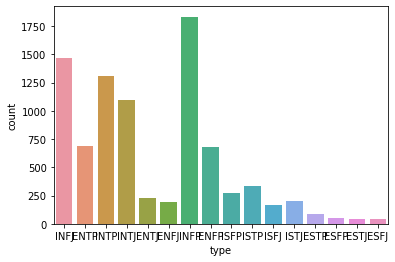

In [7]:
# Plot
sns.countplot(x='type',data=df)

In [8]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [16]:
import re

# เปลี่ยนเป็น lower case
df["clean_posts"] = df["posts"].str.lower()

# เปลี่ยน ||| เป็นช่องว่าง
df["clean_posts"] = df["clean_posts"].str.replace(
    re.compile(r"\|\|\|"), " "
)

df["clean_posts"] = df["clean_posts"].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"), ""
)

# ลบ email
df["clean_posts"] = df["clean_posts"].str.replace(
    re.compile(r"\S+@\S+"), ""
)
"""
# ลบเครื่องหมายต่างๆ
df["clean_posts"] = df["clean_posts"].str.replace(
    re.compile(r"[^a-z\s]"), " "
)
"""


# ลบอันที่มี MBTIs ในโพส์
mbti = df["type"].unique()
for type_word in mbti:
    df["clean_posts"] = df["clean_posts"].str.replace(
        type_word.lower(), ""
    )

df.head()

,type,posts,clean_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,' and moments sportscenter not top ten p...
1,ENTP,'I'm finding the lack of me in these posts ver...,'i'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'good one _____ of course, to which i say ..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'dear , i enjoyed our conversation the other..."
4,ENTJ,'You're fired.|||That's another silly misconce...,'you're fired. that's another silly misconcept...


In [17]:
"""
# ลบข้อความยาวๆ
df["clean_posts"] = df["clean_posts"].str.replace(
    re.compile(r"\b\w{1,2}\b"), ""
)

df.head()
"""

'\n# ลบข้อความยาวๆ\ndf["clean_posts"] = df["clean_posts"].str.replace(\n    re.compile(r"\x08\\w{1,2}\x08"), ""\n)\n\ndf.head()\n'

In [18]:
"""
# User handles
df['clean_posts'] = df['posts'].apply(nfx.remove_userhandles)
df
"""

"\n# User handles\ndf['clean_posts'] = df['posts'].apply(nfx.remove_userhandles)\ndf\n"

In [19]:
"""
# Stopwords
df['clean_posts'] = df['posts'].apply(nfx.remove_stopwords)
df
"""

"\n# Stopwords\ndf['clean_posts'] = df['posts'].apply(nfx.remove_stopwords)\ndf\n"

In [20]:
tfidf = TfidfVectorizer(analyzer='word')

In [21]:
x = tfidf.fit_transform(df['clean_posts'])
x

<8675x107706 sparse matrix of type '<class 'numpy.float64'>'
	with 4366002 stored elements in Compressed Sparse Row format>

In [22]:
y = df['type']
y

0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
8670    ISFP
8671    ENFP
8672    INTP
8673    INFP
8674    INFP
Name: type, Length: 8675, dtype: object

In [23]:
# Features & Labels
Xfeatures = df['clean_posts']
ylabels = df['type']

In [24]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [25]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,test_size=0.2,random_state=0,)

# model

In [26]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [27]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [28]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\icesnow\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [29]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [30]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.33192470226661547

In [31]:
pipe_lr.score(x_train,y_train)

0.6888998682476943

In [45]:
# Make A Prediction
ex1 = "Who would hate me? who doesn't like us then let him go can't go forbid Because I don't care about it and waste my time making a living. It's better to use my brain to think about making money."

In [46]:
pipe_lr.predict([ex1])

array(['INTJ'], dtype=object)

In [47]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.03187488, 0.04450768, 0.09674213, 0.10422876, 0.03374528,
        0.05739154, 0.04277041, 0.05207987, 0.03301879, 0.03872028,
        0.10507275, 0.09764374, 0.06116995, 0.05068492, 0.08748466,
        0.06286435]])

In [48]:
# To Know the classes
pipe_lr.classes_

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [36]:
sgd = SGDClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()

In [38]:
#fitting
sgd.fit(x_train2,y_train2)
lr.fit(x_train2,y_train2)
svc.fit(x_train2,y_train2)

#ypred
ypredsgd = sgd.predict(x_train2)
ypredlr = lr.predict(x_train2)
ypredsvc = svc.predict(x_train2)

C:\Users\icesnow\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print (accuracy_score(y_train2, ypredsgd))
print (accuracy_score(y_train2, ypredlr))
print (accuracy_score(y_train2, ypredsvc))

0.9815561959654179
0.6138328530259366
0.9974063400576368


In [54]:
# Make A Prediction
ex2 = "Who would hate me? who doesn't like us then let him go can't go forbid Because I don't care about it and waste my time making a living. It's better to use my brain to think about making money “The hidden good side of being gossiped is that we will be able to move past people's mouths. and become stronger.”"

In [60]:
result = "ESFJ"

In [55]:
ex2 = pd.Series(ex2)
fifinal = tfidf.transform(ex2)

In [56]:
sgd.predict(fifinal)

array(['ENTJ'], dtype='<U4')

In [57]:
lr.predict(fifinal)

array(['INTP'], dtype=object)

In [58]:
svc.predict(fifinal)

array(['ENTJ'], dtype=object)

In [66]:
# Fit the model
model = LinearSVC()
model.fit(x_train2,y_train2)
# save the model to disk
filename = 'finalized_model.pkl'
joblib.dump(model, filename)

['finalized_model.pkl']

In [67]:
# Save Model & Pipeline
import joblib
pipeline_file = open("final_model_teatea.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()